# Analysis for San Francisco Bay Ford GoBike Service 2017
## by Muhammad Adipurna Kusumawardana

## Investigation Overview

> In this project, we want to demonstrate the importance and value of data visualization techniques in the data analysis process. First, we use Python to do the exploration and visualization using frequently used libraries, such as NumPy, pandas, Matplotlib, and Seaborn. Then, in the second part we will produce a short presentation that illustrated interesting discovery from our dataset. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
https://www.lyft.com/bikes/bay-wheels/system-data  

The Data
Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import re 
import glob
import zipfile
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2017_clean = pd.read_csv('df_2017_clean.csv')
df_2017_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,start_day,hour,date
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sunday,16,2017-12-31
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sunday,15,2017-12-31
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sunday,22,2017-12-31
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sunday,17,2017-12-31
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sunday,14,2017-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517006,796,2017-07-01 02:30:42.375,2017-07-01 02:43:58.779,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,887,Customer,July,Saturday,2,2017-07-01
517007,229,2017-07-01 02:11:07.168,2017-07-01 02:14:56.593,25,Howard St at 2nd St,37.787522,-122.397405,19,Post St at Kearny St,37.788975,-122.403452,622,Subscriber,July,Saturday,2,2017-07-01
517008,205,2017-07-01 02:05:36.240,2017-07-01 02:09:02.044,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,45,Subscriber,July,Saturday,2,2017-07-01
517009,282,2017-07-01 01:21:12.583,2017-07-01 01:25:55.307,41,Golden Gate Ave at Polk St,37.781270,-122.418740,59,S Van Ness Ave at Market St,37.774814,-122.418954,245,Subscriber,July,Saturday,1,2017-07-01


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike User Comparison 

> From the total entry of 519700 row in 2017 data, more than three-quarter users is Subscribers.
> * Customer  : 110470
> * Subcriber : 409230

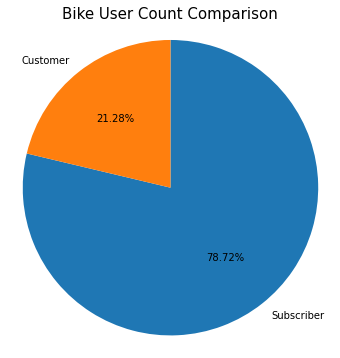

In [3]:
# Show user type by it's percentage
plt.figure(figsize=(10,6))
sorted_counts = df_2017_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

## Timely Usage Service

> * This service is more widely used on weekdays than weekends.   
> * Ford GoBike was launched at the end of June, the users of this service in July were still few, then the trend continued to increase until October.

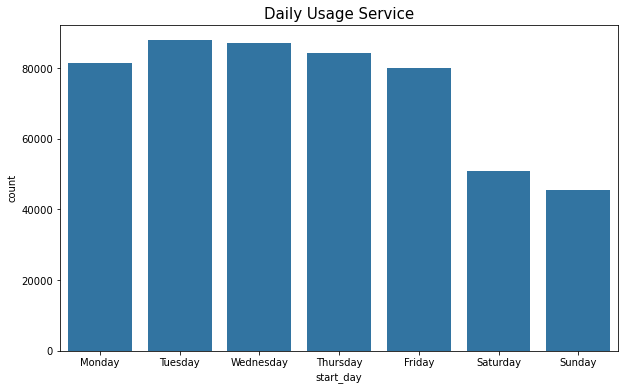

In [4]:
# Countplot bike usage based on weekday

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
base_color = sns.color_palette()[0]

plt.figure(figsize=(10,6))
plt.title('Daily Usage Service', fontsize=15)
sns.countplot(data=df_2017_clean, x='start_day', order=day_name, color=base_color);

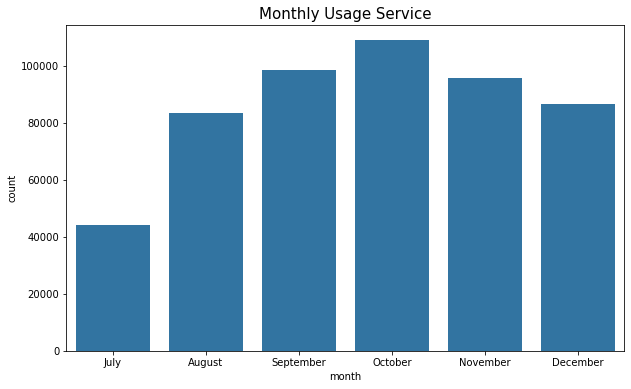

In [5]:
# Countplot bike usage based on month

month_name = ['July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,6))
plt.title('Monthly Usage Service', fontsize=15)
sns.countplot(data=df_2017_clean, x='month', order=month_name, color=base_color);

## Bike Service Popular Times

> Based on the following plot, the use of bicycle services is the most during peak hours.

This plot can be a recommendation hour to people who want to use this service.

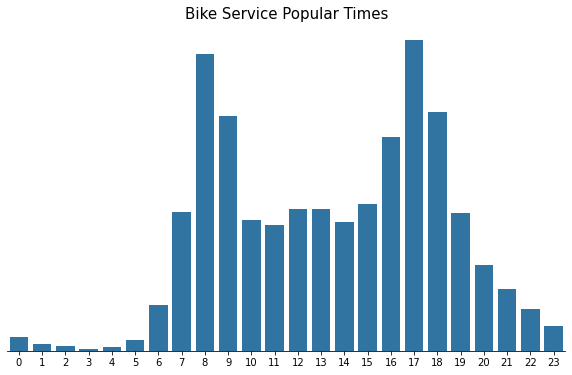

In [6]:
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df_2017_clean, x='hour', order=hour_order, color=base_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

## Most Popular Station

> For each start and end station, we choose ten most popular station. Then from the both, we only choose those that fall into the two category, those stations are:
> * Steuart St at Market St
> * Powell St BART Station (Market St at 4th St)
> * Berry St at 4th St
> * Montgomery St BART Station (Market St at 2nd St)
> * Market St at 10th St
> * San Francisco Caltrain Station 2  (Townsend St at 4th St)
> * San Francisco Caltrain (Townsend St at 4th St)
> * The Embarcadero at Sansome St
> * San Francisco Ferry Building (Harry Bridges Plaza)

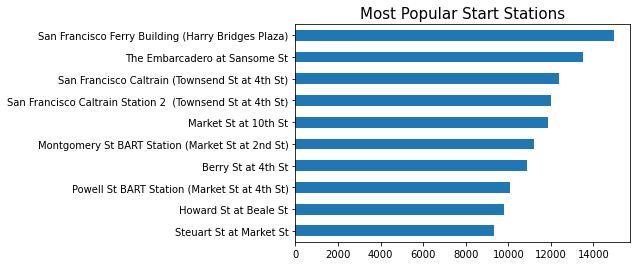

In [7]:
plt.title('Most Popular Start Stations', fontsize=15)
df_2017_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

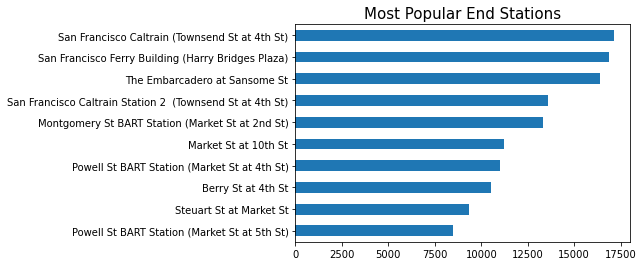

In [8]:
plt.title('Most Popular End Stations', fontsize=15)
df_2017_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

## Least Popular Station
>For each start and end station, we choose ten least popular station. Then from the both, we only choose those that fall into the two category, those stations are:
> * Ellsworth St at Russell St
> * Jackson St at 11th St
> * Empire St at 1st St
> * Harmon St at Adeline St
> * Pierce Ave at Market St
> * Bestor Art Park
> * W St John St at Guadalupe River Trail
> * Derby St at College Ave
> * University Ave at Oxford St

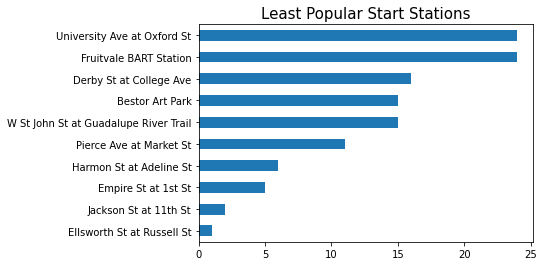

In [9]:
plt.title('Least Popular Start Stations', fontsize=15)
df_2017_clean.start_station_name.value_counts(ascending=True).head(10).plot.barh();

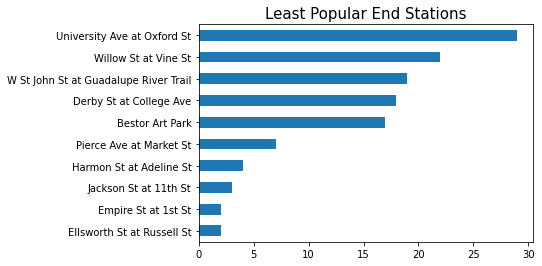

In [10]:
plt.title('Least Popular End Stations', fontsize=15)
df_2017_clean.end_station_name.value_counts(ascending=True).head(10).plot.barh();

## Service Usage by Datetime Analysis

### Service Usage by Month

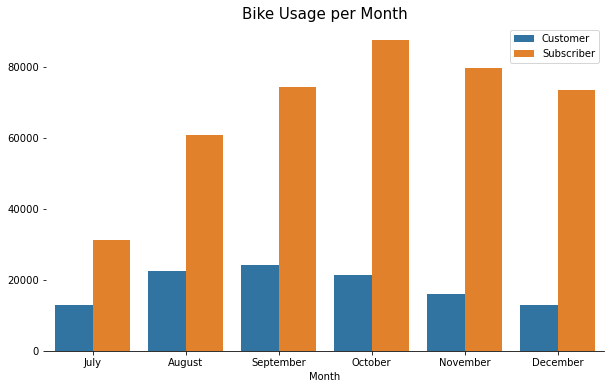

In [11]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Month', fontsize=15)
chart = sns.countplot(data=df_2017_clean, x='month', order=month_name, hue='user_type')

chart.set(xlabel='Month', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

### Service Usage by Day of the Week

> * The use of this service for Subscribers is high on weekdays and decreases on weekends. Usually  
> * In contrast to Subscribers, Customers have increased on weekends, starting from Friday and decreasing on Sundays. It is possible that the newcomers will return to their respective places that day, because Monday they have started their activities again.

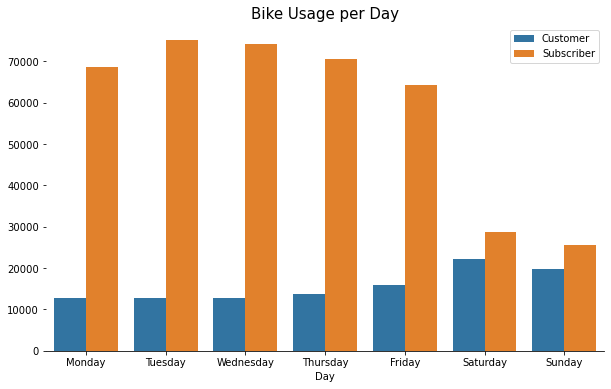

In [12]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Day', fontsize=15)
chart = sns.countplot(data=df_2017_clean, x='start_day', order=day_name, hue='user_type')
chart.set(xlabel='Day', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

### Service Usage by Hour

> * Most Subscribers use the service at peak hour.  
> * In contrast, Customers if have more flexible time, mostly at noon until afternoon.

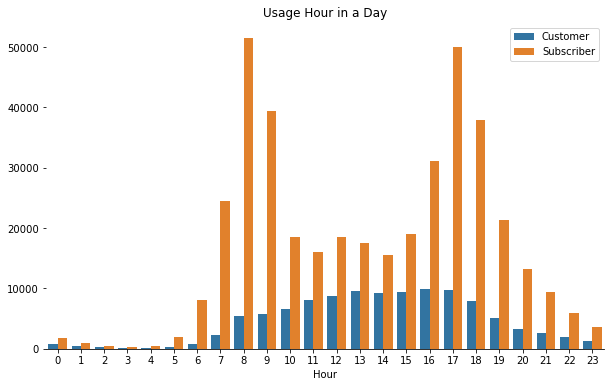

In [13]:
plt.figure(figsize=(10,6))
plt.title('Usage Hour in a Day')
chart = sns.countplot(data=df_2017_clean, x='hour', hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

## Monthly Duration Usage

> * At the beginning of this service, the Customers used this service with the longest duration than the following months. This could be due to the new service hype.  
> * It is different with Subcribers, their usage duration tends to be stable since the beginning of the service opening.

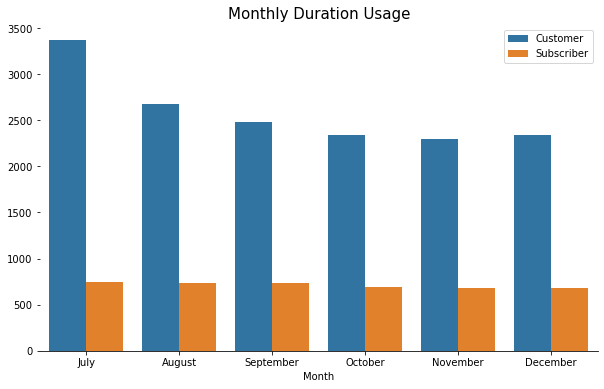

In [14]:
plt.figure(figsize=(10,6))
plt.title('Monthly Duration Usage', fontsize=15)
chart = sns.barplot(data=df_2017_clean, x='month', y='duration_sec', order=month_name, hue='user_type', ci=None)

chart.set(xlabel='Month', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

## Hourly Duration Usage 

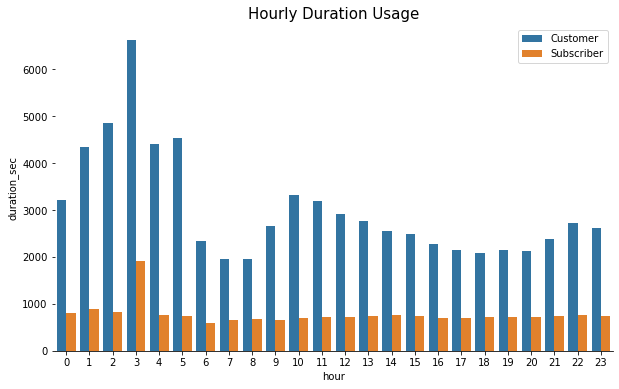

In [15]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
sns.barplot(data=df_2017_clean, x='hour', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

## Key Insights for Presentation

The type of user has an influence on the use of this service. There are quite a lot of differences here and there, such as:
> * Duration of use
>> Subscribers tends to have stable duration usage than Customers
> * Days of use
>> Subscribers tends to use the service in weekdays, in contrast Customers have more flexible time.
> * Hours of use
>> Subscribers is have very intense usage at peak hour, Customers have more flexible time.  

> It's kind of surprise that average duration at 3.00 AM is most high than in other hour.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!